## Imports

In [ ]:
# General Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import pi
import pickle
import os

from sklearn.preprocessing import MinMaxScaler


!pip install squarify
import squarify

# Dates
import datetime as dt
from datetime import timedelta

import warnings
warnings.simplefilter(action = 'ignore')

# Sommaire
!pip install jyquickhelper
from jyquickhelper import add_notebook_menu # attention, ne prend que les titres de niveau 2
add_notebook_menu()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 10.8 MB/s eta 0:00:00


In [ ]:
# Set display preferences
pd.set_option('display.max_row', 250)
pd.set_option('display.max_column', 100)
pd.set_option('display.precision', 5)

In [ ]:
# à run pour colab uniquement
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import des données

path = '/content/drive/MyDrive/OpenClassrooms/Projet5/' #-> pour colab
#path = '' #-> en local

filepath = os.path.join(path, 'df_for_rfm')

with open(filepath, 'rb') as f:
    df_final = pickle.load(f)

df_final.head()

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_item_id,product_id,seller_id,price,freight_value,seller_city,seller_state,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,product_category,review_time,order_time,delivery_error_time,order_preparation_time,delivery_time,shipping_limit_respect,purchase_time,purchase_year,purchase_month,purchase_dayofweek,purchase_day,purchase_hour,full_written_review,written_review_title,product_volume_cm3,distance
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,itaquaquecetuba,SP,41.0,1141.0,1.0,8683.0,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,Furniture,4.94074,8.81250,-10.55862,6.80955,1.99141,-0.80955,2017-05-16 15:05:35,2017.0,5.0,1.0,16.0,15.0,0,0,107136.0,228.79538
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,289.00,46.48,itajai,SC,43.0,1002.0,3.0,10150.0,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,Home & Garden,11.94686,16.66175,-7.47131,2.84476,13.80995,3.15524,2018-01-12 20:48:24,2018.0,1.0,4.0,12.0,20.0,0,0,53400.0,302.71858
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,itaquaquecetuba,SP,55.0,955.0,1.0,8267.0,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,Furniture,0.50763,26.07715,1.74920,21.92488,3.14434,-5.92488,2018-05-19 16:07:45,2018.0,5.0,5.0,19.0,16.0,0,0,45968.0,29.14657
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,itaquaquecetuba,SP,48.0,1066.0,1.0,12160.0,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,Furniture,4.77554,14.99846,-12.33027,14.24541,0.69564,-0.28572,2018-03-13 16:06:38,2018.0,3.0,1.0,13.0,16.0,0,0,79968.0,18.11744
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,230.00,22.25,ibitinga,SP,61.0,407.0,1.0,5200.0,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,Home & Garden,7.08324,11.46132,-5.12792,1.21240,10.23597,0.78760,2018-07-29 09:51:30,2018.0,7.0,6.0,29.0,9.0,1,1,23625.0,187.45960


In [ ]:
df_final.isna().sum()

customer_id                      0
customer_unique_id               0
customer_city                    0
customer_state                   0
order_id                       625
order_status                   625
order_purchase_timestamp       625
order_item_id                 1278
product_id                    1278
seller_id                     1278
price                         1278
freight_value                 1278
seller_city                   1278
seller_state                  1278
product_name_lenght           2972
product_description_lenght    2972
product_photos_qty            2972
product_weight_g              1298
payment_sequential             628
payment_type                   628
payment_installments           628
payment_value                  628
review_id                     1602
review_score                  1602
product_category              2995
review_time                   1602
order_time                    3303
delivery_error_time           3303
order_preparation_ti

## Segmentation RFM

In [ ]:
# https://www.datacamp.com/tutorial/introduction-customer-segmentation-python
# https://medium.com/@ugursavci/customer-segmentation-using-rfm-analysis-in-python-218a3255f714
# https://guillaume-martin.github.io/rfm-segmentation-with-python.html

# RFM stands for recency, frequency, and monetary value. A method used to segment customers based on when their
# last purchase was(recency), how often they’ve purchased in the past (frequency), and how much they’ve spent
# overall (monetary). The output can be used to increase customer retention, customer engagement and targeted
# marketing.

# R - date de la dernière commande (Récence) = number of days since last purchase
# F - fréquence des commandes = number of purchases during the studied period
# M - montant de la dernière commande ou sur une période donnée = total amount of purchases made during the studied period

# but = établir des segments de clients homogènes
# The purpose of RFM analysis is to form segments and, depending on the segment, influence them in a certain way.

In [ ]:
## Total price
# = prix unitaire * quantité

df_final['total_price'] = df_final['price'] * df_final['order_item_id']

## Recency
# convertir date en datetime
df_final['order_purchase_timestamp'] = pd.to_datetime(df_final['order_purchase_timestamp'])
# dataset pas super récent -> on prend la date max + 1 jour à la place de la date d'aujourd'hui
now = df_final['order_purchase_timestamp'].max() + timedelta(days = 1)

## créer RFM dataframe
rfm = df_final.groupby('customer_id').agg({
    'order_purchase_timestamp' : lambda day : (now - day.max()).days, # pour avoir temps écoulé depuis commande
    'order_id': lambda num : len(num),
    'total_price': lambda price : price.sum()
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']

rfm.head()

,Recency,Frequency,Monetary
customer_id,,,
00012a2ce6f8dcda20d059ce98491703,293.0,1,89.80
000161a058600d5901f007fab4c27140,414.0,1,54.90
0001fd6190edaaf884bcaf3d49edf079,552.0,1,179.99
0002414f95344307404f0ace7a26f1d5,383.0,1,149.90
000379cdec625522490c315e70c7a9fb,154.0,1,93.00


### Calculating RFM Score

In [ ]:
rfm["Frequency"].unique()

array([ 1,  4,  2,  3,  6,  7,  5,  8, 10, 12, 11, 15, 38,  9, 16, 20, 63,
       24, 13, 21, 14, 26, 29, 22, 19])

In [ ]:
import statistics

# les quantiles sont des points de données qui divisent un ensemble de données en des fractions égales

# calculer les quartiles
statistics.quantiles(rfm["Frequency"])

# calculer quintiles ?
statistics.quantiles(rfm["Frequency"], n = 5)

[1.0, 1.0, 1.0, 1.0]

In [ ]:
rfm["Frequency"].value_counts()

1     86557
2      9798
3      1554
4       829
6       277
5       242
7        47
8        40
12       21
10       17
9        13
11       11
15        6
24        5
14        5
13        4
20        3
21        3
16        2
22        2
29        1
38        1
26        1
63        1
19        1
Name: Frequency, dtype: int64

In [ ]:
print("Le nombre de clients ayant commandé plus d'une fois est de : {:.2f} %"
      .format(100*sum(rfm["Frequency"] > 1)/len(rfm)))

Le nombre de clients ayant commandé plus d'une fois est de : 12.96 %


In [ ]:
def plot_hist(rfm, figsize = (12, 7)):

    plt.figure(1, figsize = figsize)

    for i, col in enumerate(rfm):
        plt.subplot(len(rfm.columns), 1, i + 1)
        plt.hist(rfm[col],
                 bins = int(1 + np.log2(len(rfm))),
                 label = 'skweness : ' + str(round(rfm[col].skew(), 2)),
                 density = True)
        plt.ylabel("Nombre de clients (%)")
        plt.xlabel(col)
        plt.legend()
    plt.show()

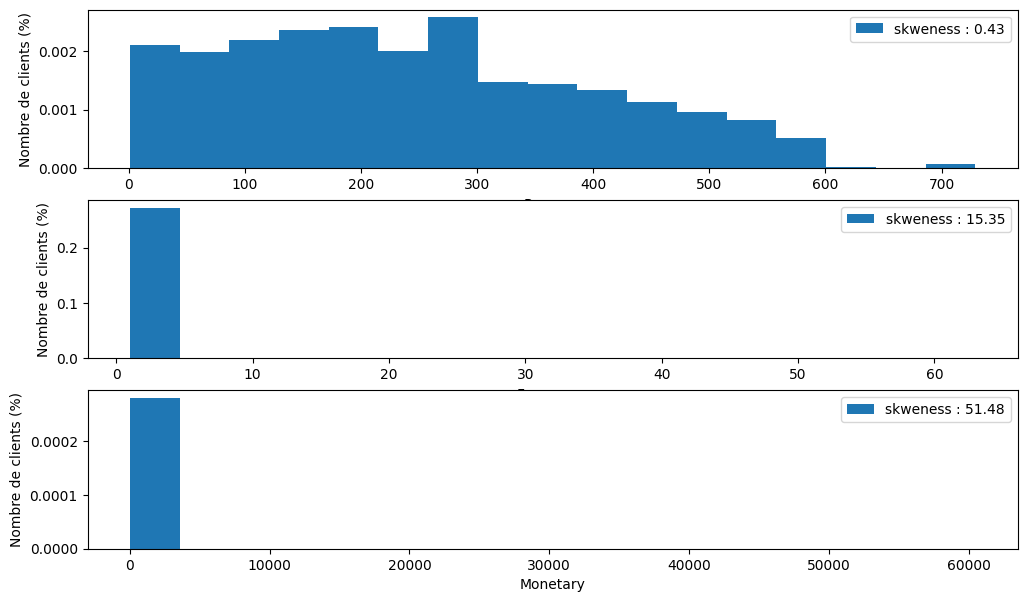

In [ ]:
# Histogramme des variables 'Recency', 'Frequency' et 'Monetary'
plot_hist(rfm)

In [ ]:
# Recency -> ok
# Frenquency et Monetary -> forte asymétrie
# passage au log pour corriger ça

In [ ]:
# PASSAGE AU LOG

#https://github.com/MGL56/Projet_4/blob/master/Projet_4.ipynb


rfm[["Frequency", "Monetary"]] = rfm[["Frequency", "Monetary"]].apply(lambda x: np.log(1 + x))

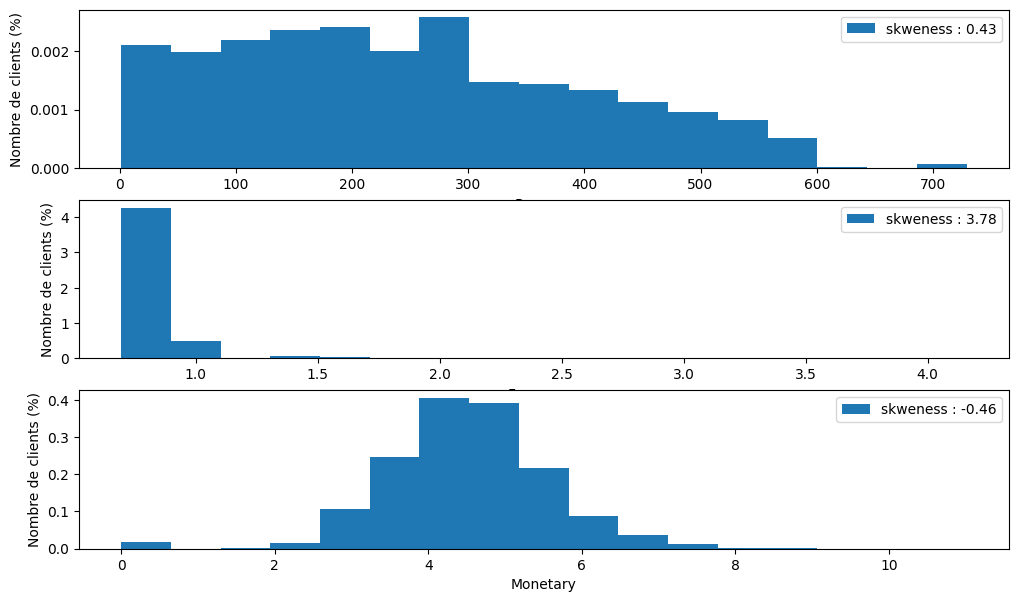

In [ ]:
plot_hist(rfm)

In [ ]:
# mieux - toujours pas fou pour frequency mais quand même mieux

In [ ]:
# recency -> nombre inversés car plus c'est récent mieux c'est

# Customers with the lowest recency, highest frequency and monetary amounts considered as top customers.

# qcut() is Quantile-based discretization function. qcut bins the data based on sample quantiles.
# For example, 1000 values for 5 quantiles would produce a categorical object indicating quantile membership for
# each customer

rfm["R"] = pd.qcut(rfm["Recency"], 5, labels = [5, 4, 3, 2, 1])
rfm["F"] = pd.qcut(rfm["Frequency"], 5, labels = [1, 2, 3, 4, 5])
rfm["M"] = pd.qcut(rfm["Monetary"], 5, labels = [1, 2, 3, 4, 5])
rfm["RFM_Score"] = rfm["R"].astype(str) + rfm["F"].astype(str) + rfm["M"].astype(str)

rfm.head()

ValueError: ignored

In [ ]:
# autre méthode :

In [ ]:
def r_score(x, quintiles):
    """
    Attribue une note entre 1 et 5 suivant l'emplacement de x par
    rapport aux quintiles. Plus la 'Recency' est faible, plus la note
    est élevé
    x(float): valeur
    quintiles(dict): voir fonction calculQuantile
    """

    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1


def fm_score(x, quintiles, c):
    """
    Attribue une note entre 1 et 5 suivant l'emplacement de x par
    rapport aux quintiles. Plus x est grand, plus la note est grande
    x(float): valeur
    quintiles(dict): voir fonction calculate_quantile
    """

    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5


def calculate_quantile(rfm):
    """
    Calcul des quantiles pour chaque variable Recency, Frequency et Monetary
    puis attribue un score (fm_score et r_score) suivant la valeur
    des variables de chaque individu
    rfm(pd.DataFrame): présente les colonnes 'Recency', 'Frequency' et Monetary
    """
    quintiles = rfm[['Recency',
                     'Frequency',
                     'Monetary']].quantile([.2, .4, .6, .8]).to_dict()

    rfm['R'] = rfm['Recency'].apply(lambda x:
                                    r_score(x, quintiles))
    rfm['F'] = rfm['Frequency'].apply(lambda x:
                                      fm_score(x, quintiles, 'Frequency'))
    rfm['M'] = rfm['Monetary'].apply(lambda x:
                                     fm_score(x, quintiles, 'Monetary'))
    return rfm

In [ ]:
# Calcul des quantiles
calculate_quantile(rfm)

,Recency,Frequency,Monetary,R,F,M
customer_id,,,,,,
00012a2ce6f8dcda20d059ce98491703,293.0,0.69315,4.50866,2,1,3
000161a058600d5901f007fab4c27140,414.0,0.69315,4.02356,1,1,2
0001fd6190edaaf884bcaf3d49edf079,552.0,0.69315,5.19844,1,1,4
0002414f95344307404f0ace7a26f1d5,383.0,0.69315,5.01662,2,1,4
000379cdec625522490c315e70c7a9fb,154.0,0.69315,4.54329,4,1,3
...,...,...,...,...,...,...
fffecc9f79fd8c764f843e9951b11341,158.0,1.38629,5.11018,4,5,4
fffeda5b6d849fbd39689bb92087f431,104.0,0.69315,3.88978,4,1,2
ffff42319e9b2d713724ae527742af25,82.0,0.69315,5.30281,5,1,5


In [ ]:
rfm.isna().sum()

Recency      625
Frequency      0
Monetary       0
Segment        0
dtype: int64

In [ ]:
#### attention, données manquantes !...

In [ ]:
rfm["RFM_Score"] = rfm["R"].astype(str) + rfm["F"].astype(str) + rfm["M"].astype(str)

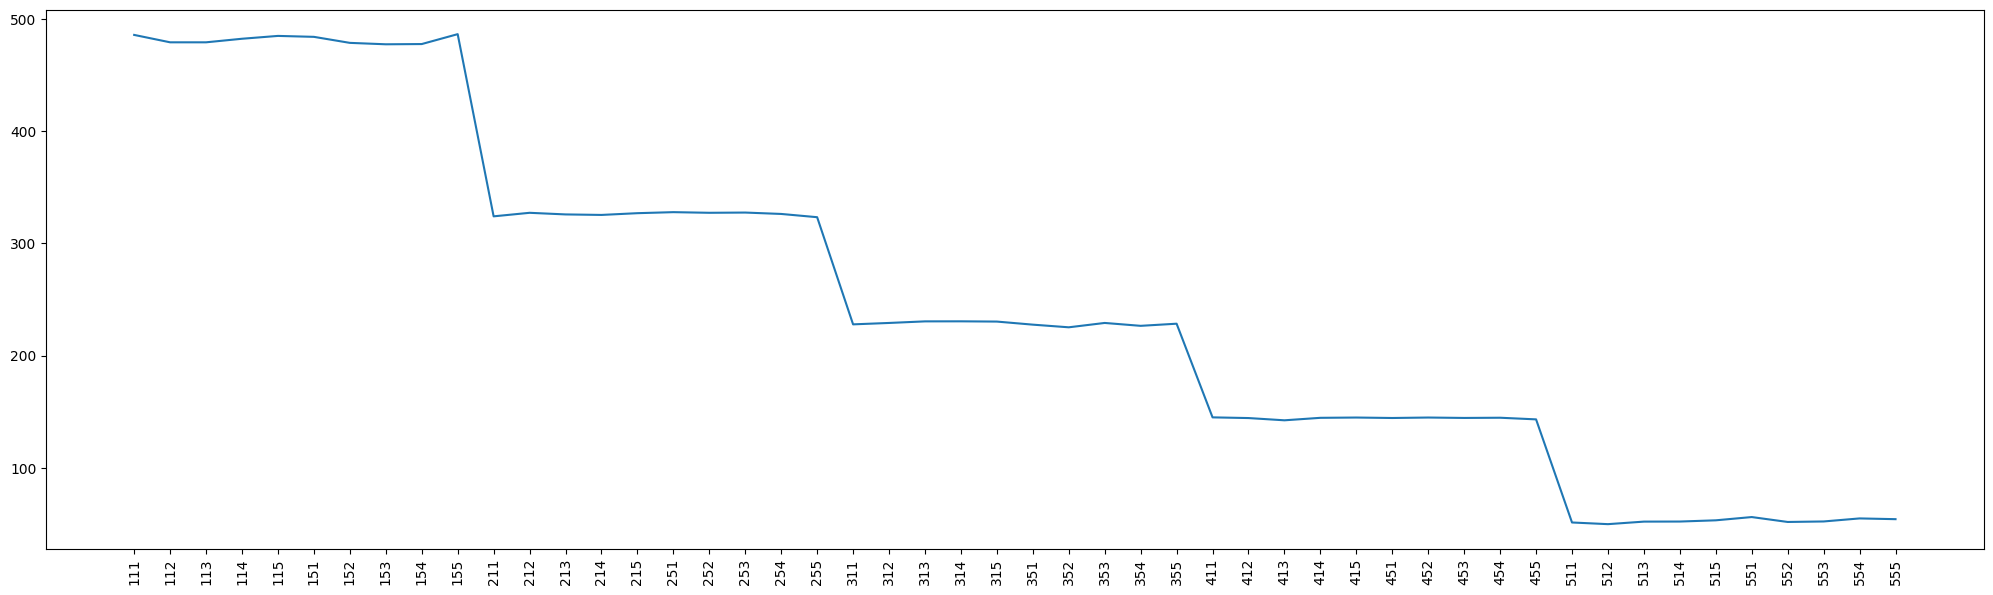

In [ ]:
plt.figure(figsize = (25, 7))
plt.plot(rfm.groupby('RFM_Score').agg('Recency').mean())
plt.xticks(rotation = 90)
plt.show()

### Segmentation Customers

In [ ]:
# exemples d'interprétation des segments RFM

#R=5, F=5, M=5 — they pay often, a lot and recently. The most loyal and active users.
#R=1, F=1, M=1 – they pay little, rarely and for a long time. Most likely lost customers. It may not be worth taking action to return them if the cost of attraction is higher than the expected profit.
#R=1/2, F=4/5, M=4/5 — loyal users on the verge of leaving. We offer them a bonus, a discount and try to return them.
#R=4/5, F=1, M=1/2/3/4/5 — Users have recently made a payment. We try to encourage them to buy more.

In [ ]:
# use Recency and Frequency to segment our customers
# 10 segments based on the R and F scores

seg_map = {
    r'[1-2][1-2]': 'Hibernating', # Last purchase was long back and low number of orders. May be lost
    r'[1-2][3-4]': 'At Risk', # Purchased often but a long time ago. Need to bring them back!
    r'[1-2]5': 'Can\'t Loose', # Used to purchase frequently but haven’t returned for a long time
    r'3[1-2]': 'About to Sleep', # Below average recency and frequency. Will lose them if not reactivated
    r'33': 'Need Attention', # Above average recency, frequency and monetary values. May not have bought very recently though
    r'[3-4][4-5]': 'Loyal Customers', # Buy on a regular basis. Responsive to promotions
    r'41': 'Promising', # Recent shoppers, but haven’t spent much
    r'51': 'New Customers', # Bought most recently, but not often
    r'[4-5][2-3]': 'Potential Loyalists', # Recent customers with average frequency
    r'5[4-5]': 'Champions'    # Bought recently, buy often and spend the most
}

In [ ]:
# determiner comment segmenter les clients en utilisant regex

rfm['Segment'] = rfm['R'].astype(str) + rfm['F'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex = True)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
customer_id,,,,,,,,
00012a2ce6f8dcda20d059ce98491703,293.0,0.69315,4.50866,2,1,3,213,Hibernating
000161a058600d5901f007fab4c27140,414.0,0.69315,4.02356,1,1,2,112,Hibernating
0001fd6190edaaf884bcaf3d49edf079,552.0,0.69315,5.19844,1,1,4,114,Hibernating
0002414f95344307404f0ace7a26f1d5,383.0,0.69315,5.01662,2,1,4,214,Hibernating
000379cdec625522490c315e70c7a9fb,154.0,0.69315,4.54329,4,1,3,413,Promising


In [ ]:
# grouper données dans l'ordre pour voir la valeur moyenne de chaque segment
rfm.groupby('Segment').mean().sort_values('Monetary')

,Recency,Frequency,Monetary,R,F,M
Segment,,,,,,
Hibernating,403.92525,0.69315,4.27368,1.49259,1.0,2.76810
About to Sleep,229.60563,0.69315,4.36392,3.00000,1.0,2.81808
New Customers,51.49120,0.69315,4.40535,5.00000,1.0,2.84361
Promising,144.17477,0.69315,4.42769,4.00000,1.0,2.87610
Can't Loose,402.17881,1.22049,5.35046,1.51025,5.0,4.09590
Loyal Customers,184.92943,1.21345,5.39244,3.51058,5.0,4.18205
Champions,53.87844,1.21134,5.40169,5.00000,5.0,4.16095


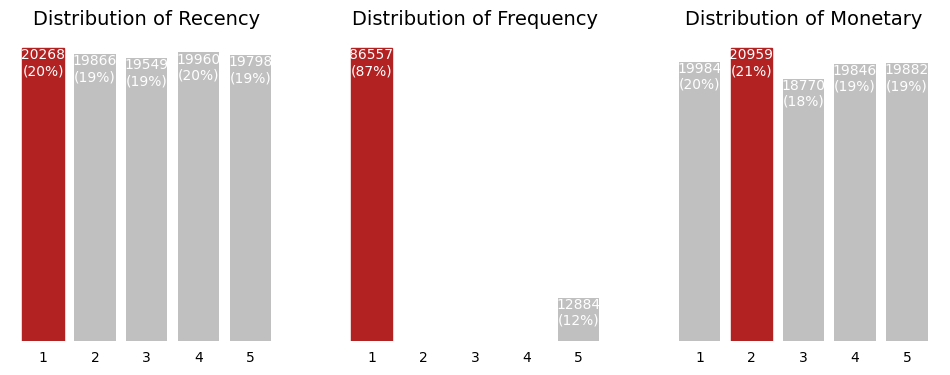

In [ ]:
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 4))

for i, p in enumerate(['R', 'F', 'M']):
    parameters = {'R':'Recency', 'F':'Frequency', 'M':'Monetary'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color = 'silver')
    ax.set_frame_on(False)
    ax.tick_params(left = False, labelleft = False, bottom = False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize = 14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha = 'center',
               va = 'top',
               color = 'w')

plt.show()

In [ ]:
# recency et monetary sont distribués de façon relativement homogènes
# par contre frequency pas du tout

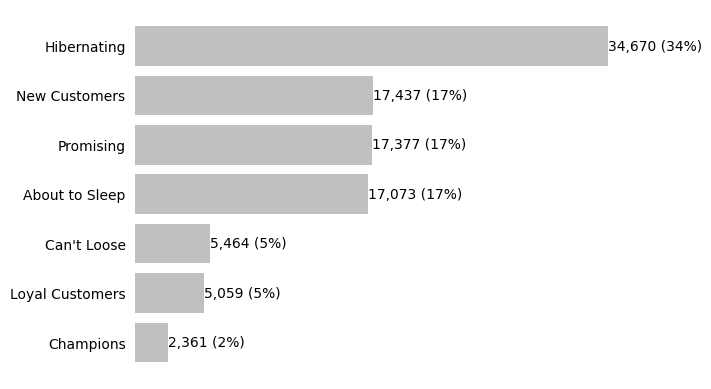

In [ ]:
# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending = True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color = 'silver')
ax.set_frame_on(False)
ax.tick_params(left = False,
               bottom = False,
               labelbottom = False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va = 'center',
                ha = 'left'
               )

plt.show()

In [ ]:
group = rfm.groupby('Segment').mean().sort_values('Monetary')
group

,Recency,Frequency,Monetary,R,F,M
Segment,,,,,,
Hibernating,403.92525,0.69315,4.27368,1.49259,1.0,2.76810
About to Sleep,229.60563,0.69315,4.36392,3.00000,1.0,2.81808
New Customers,51.49120,0.69315,4.40535,5.00000,1.0,2.84361
Promising,144.17477,0.69315,4.42769,4.00000,1.0,2.87610
Can't Loose,402.17881,1.22049,5.35046,1.51025,5.0,4.09590
Loyal Customers,184.92943,1.21345,5.39244,3.51058,5.0,4.18205
Champions,53.87844,1.21134,5.40169,5.00000,5.0,4.16095


In [ ]:
values = rfm['Segment'].value_counts().values
labels = rfm['Segment'].value_counts().index

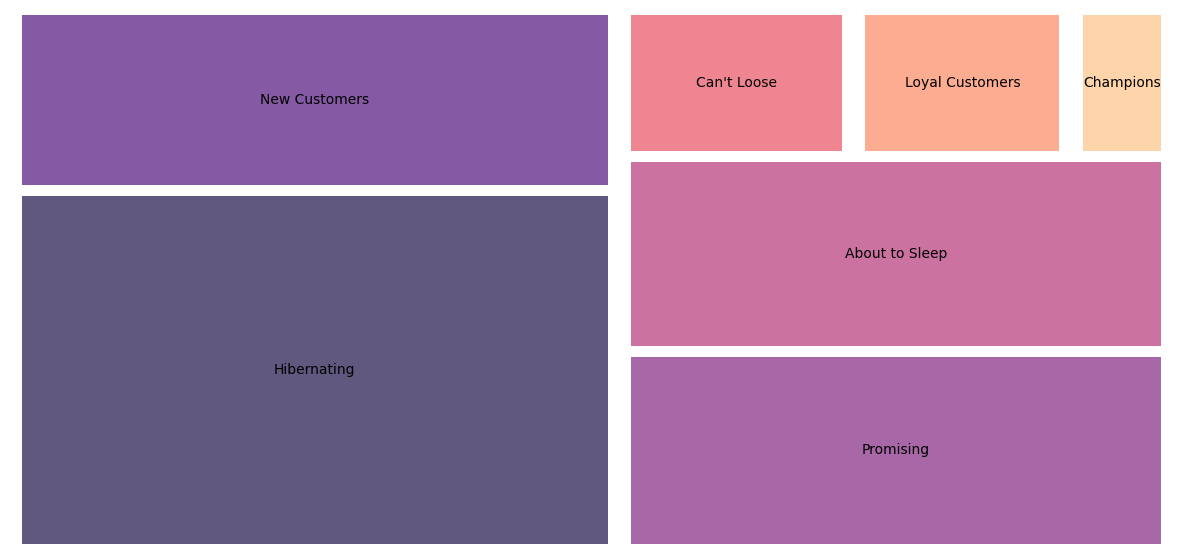

In [ ]:
plt.figure(figsize = (15, 7))
squarify.plot(values,
              label = labels,
              text_kwargs = {'fontsize': 10, 'color': 'black'},
              pad = 0.20,
              color = sns.color_palette("magma", len(values)),
              alpha = 0.7)
plt.axis('off')
plt.show()

### RFM - Conclusions

In [ ]:
# interessant mais :
# - statique/figé -> on suppose que les clients segmentés vont maintenir leurs habitudes de consommation,
# qu'ils vont se comporter dans le futur comme ils se sont comportés dans le passé
# - méthode uniquement descriptive, ne fournit pas un moyen de prévision (contrairement à un modèle prédictif)


In [ ]:
# frequence -> très faible pourcentage qui commande plus d'une fois donc pas
# avoir 5 groupes homogènes pour la fréquence -> super desequilibré

In [ ]:
# Liste des fonctions d'aggrégation
func = ['count', 'min', 'mean', 'median', 'max', 'std']
# Regroupement des données
qtd_preco = rfm.groupby(['Segment'])
# Aggrégation des données par différentes fonctions
summery_table = qtd_preco[['Recency', 'Frequency', 'Monetary']].agg(func)
# Affichage de la table de résumé
summery_table

Recency                                           Frequency  \
                  count    min       mean median    max       std     count   
Segment                                                                       
About to Sleep    17073  187.0  229.60563  229.0  276.0  26.64617     17073   
Can't Loose        5464  277.0  402.17881  390.0  729.0  93.69463      5464   
Champions          2361    5.0   53.87844   51.0  102.0  26.57833      2361   
Hibernating       34045  277.0  403.92525  392.0  700.0  93.09695     34670   
Loyal Customers    5059  103.0  184.92943  185.0  276.0  49.03853      5059   
New Customers     17437    1.0   51.49120   47.0  102.0  26.45681     17437   
Promising         17377  103.0  144.17477  143.0  186.0  24.28098     17377   

                                                             Monetary       \
                     min     mean   median      max      std    count  min   
Segment                                                                      
About to Sleep   0.69315  0.69315  0.69315  0.69315  0.00000    17073  0.0   
Can't Loose      1.09861  1.22049  1.09861  4.15888  0.26209     5464  0.0   
Champions        1.09861  1.21134  1.09861  3.09104  0.23921     2361  0.0   
Hibernating      0.69315  0.69315  0.69315  0.69315  0.00000    34670  0.0   
Loyal Customers  1.09861  1.21345  1.09861  3.21888  0.24684     5059  0.0   
New Customers    0.69315  0.69315  0.69315  0.69315  0.00000    17437  0.0   
Promising        0.69315  0.69315  0.69315  0.69315  0.00000    17377  0.0   

                                                      
                    mean   median       max      std  
Segment                                               
About to Sleep   4.36392  4.39433   8.21365  0.95465  
Can't Loose      5.35046  5.28498  11.01008  1.01582  
Champions        5.40169  5.35172   9.79261  0.98227  
Hibernating      4.27368  4.35658   8.81522  1.17518  
Loyal Customers  5.39244  5.36073   9.95233  0.96444  
New Customers    4.40535  4.39321   8.81433  0.92561  
Promising        4.42769  4.45027   8.31898  0.93443

In [ ]:
rfm = rfm.drop(["R", "F", "M", "RFM_Score"], axis = 1)

In [ ]:
rfm

,Recency,Frequency,Monetary,Segment
customer_id,,,,
00012a2ce6f8dcda20d059ce98491703,293.0,0.69315,4.50866,Hibernating
000161a058600d5901f007fab4c27140,414.0,0.69315,4.02356,Hibernating
0001fd6190edaaf884bcaf3d49edf079,552.0,0.69315,5.19844,Hibernating
0002414f95344307404f0ace7a26f1d5,383.0,0.69315,5.01662,Hibernating
000379cdec625522490c315e70c7a9fb,154.0,0.69315,4.54329,Promising
...,...,...,...,...
fffecc9f79fd8c764f843e9951b11341,158.0,1.38629,5.11018,Loyal Customers
fffeda5b6d849fbd39689bb92087f431,104.0,0.69315,3.88978,Promising
ffff42319e9b2d713724ae527742af25,82.0,0.69315,5.30281,New Customers


In [ ]:
rfm = rfm.reset_index(drop = True)

In [ ]:
rfm

,Recency,Frequency,Monetary,Segment
0,293.0,0.69315,4.50866,Hibernating
1,414.0,0.69315,4.02356,Hibernating
2,552.0,0.69315,5.19844,Hibernating
3,383.0,0.69315,5.01662,Hibernating
4,154.0,0.69315,4.54329,Promising
...,...,...,...,...
99436,158.0,1.38629,5.11018,Loyal Customers
99437,104.0,0.69315,3.88978,Promising
99438,82.0,0.69315,5.30281,New Customers
99439,366.0,1.09861,3.51750,Can't Loose


In [ ]:
# Radar plot (wip)

In [ ]:
categories = rfm['Segment'].unique()
categories

array(['Hibernating', 'Promising', 'About to Sleep', 'New Customers',
       'Loyal Customers', "Can't Loose", 'Champions'], dtype=object)

In [ ]:
# Liste des couleurs pour chaque segment
palette_1 = sns.color_palette("husl", len(categories))
colors_1 = {label: color for label, color in zip(categories, palette_1.as_hex())}

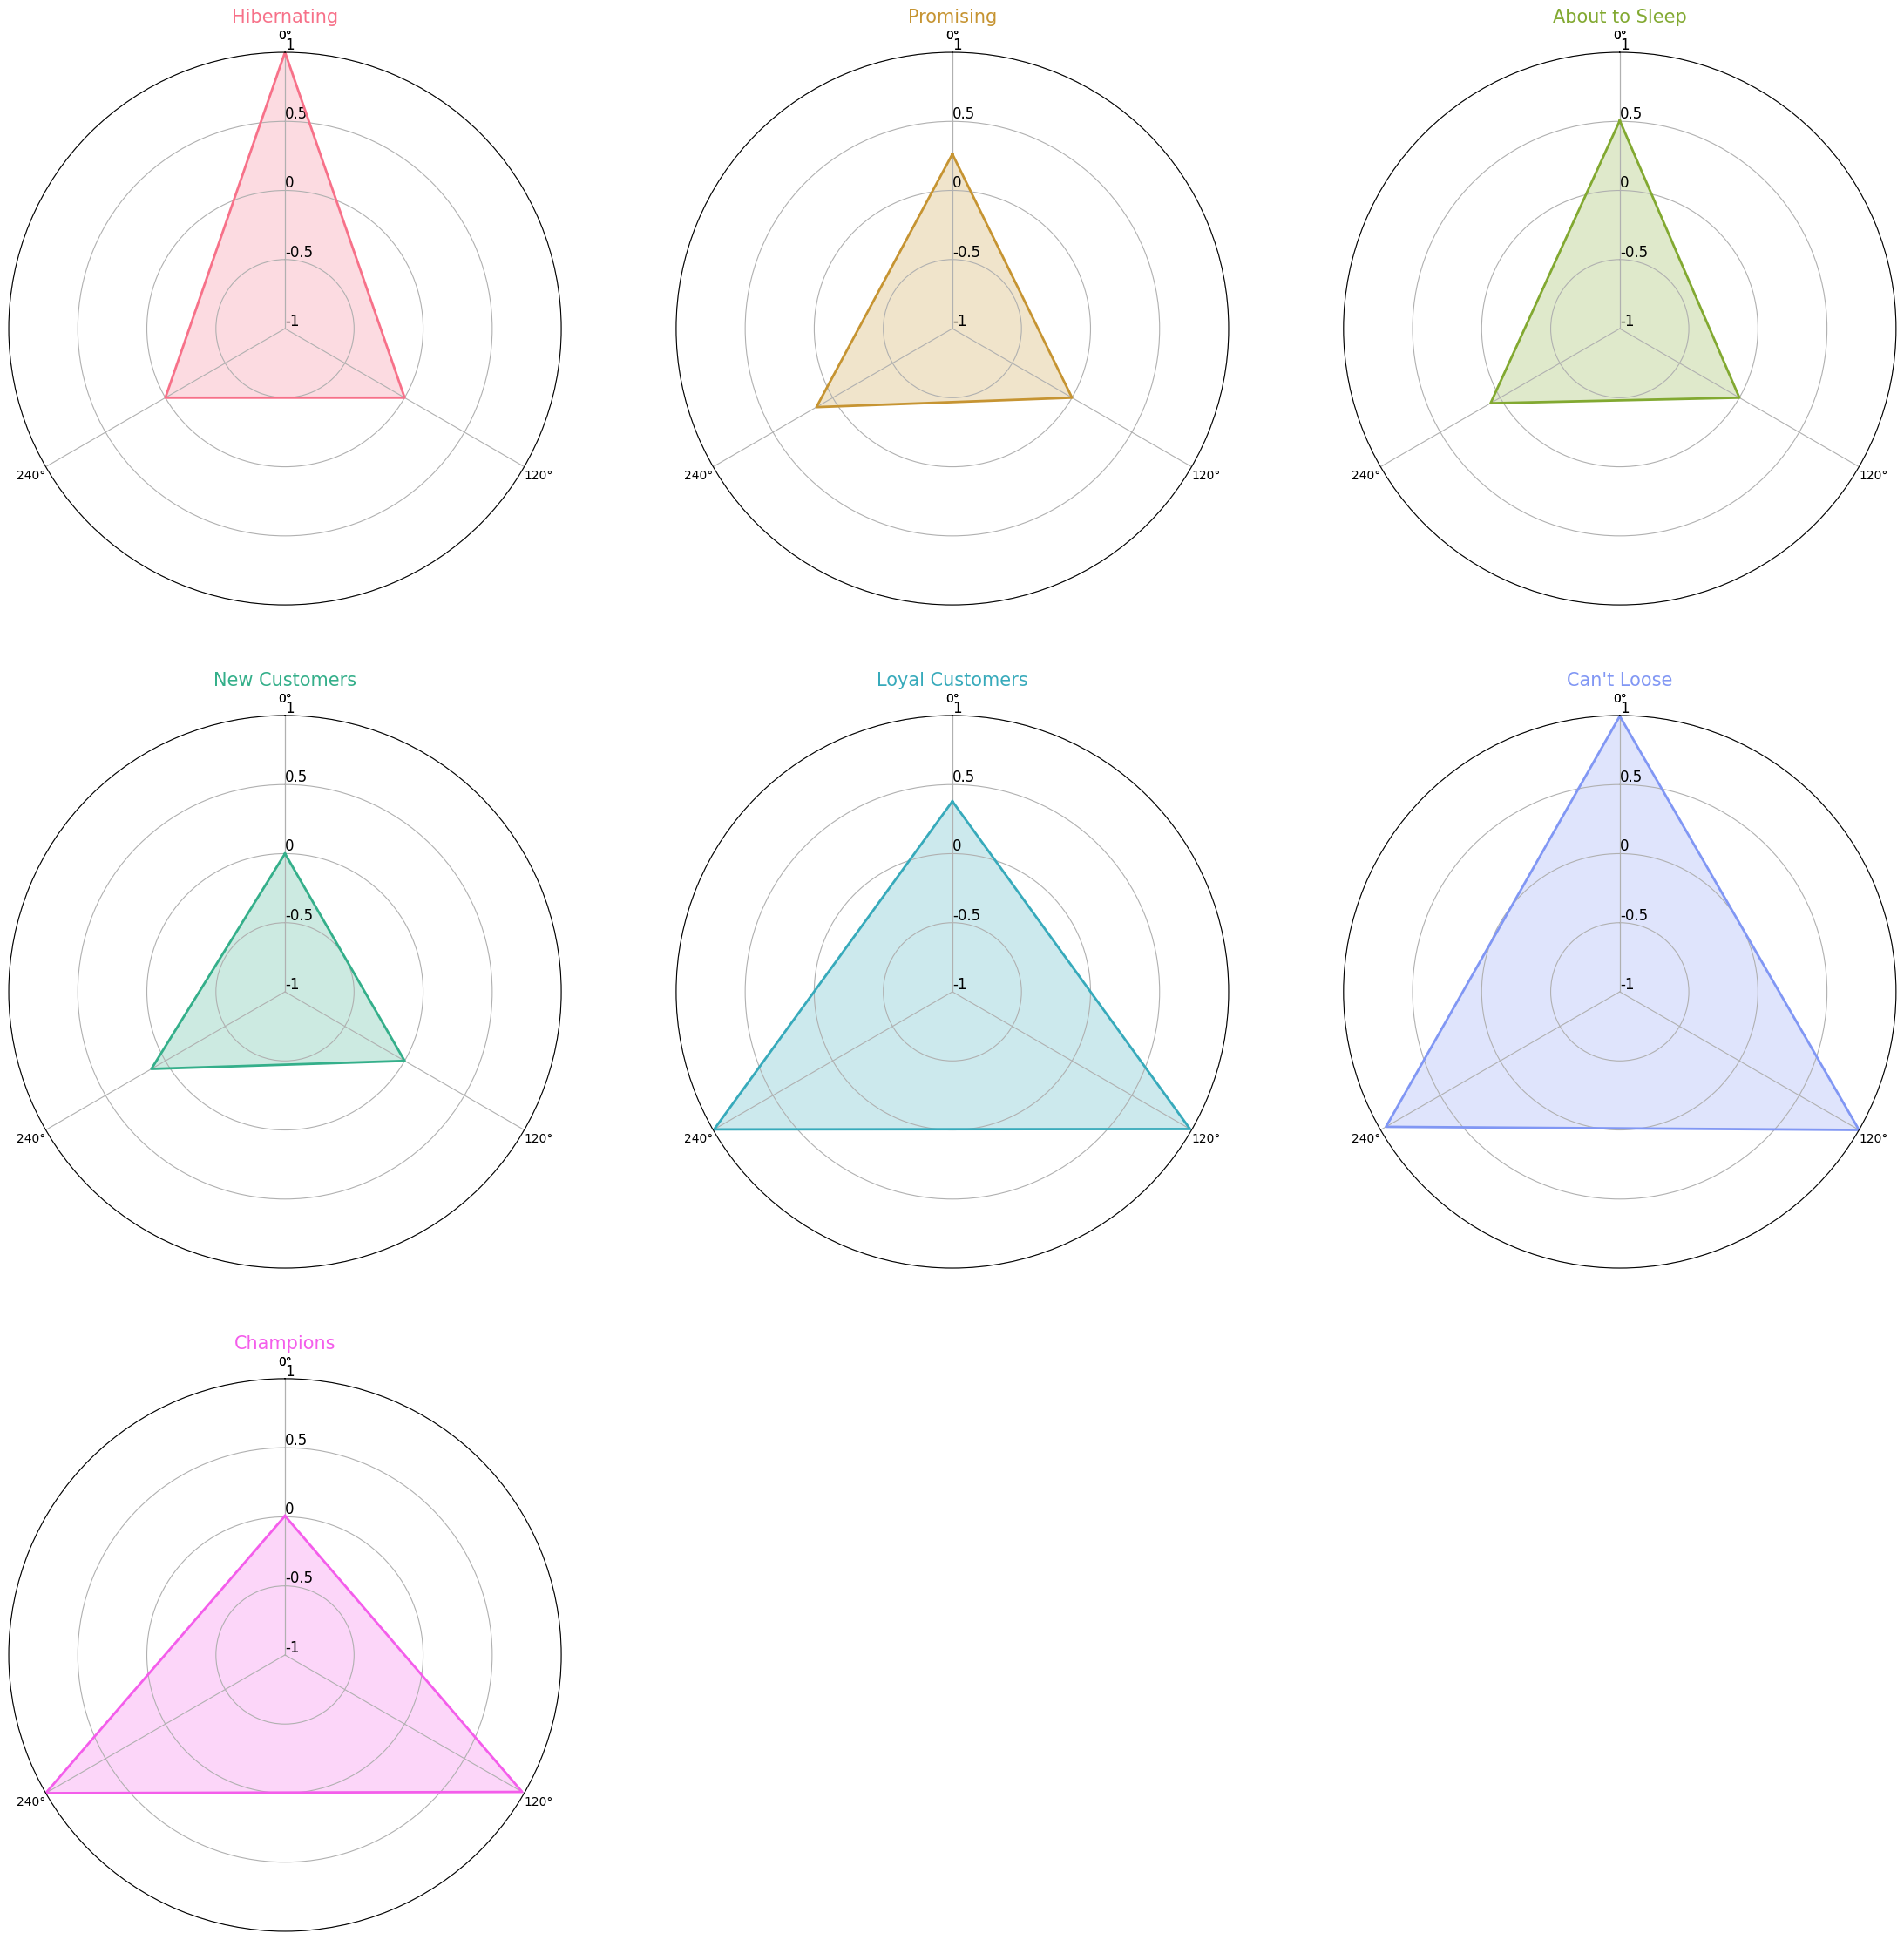

In [ ]:
colors = colors_1
sub_plot = [3, 3]

# Aggrégation par moyenne des valeurs par segment
df_plot = rfm.groupby(['Segment']).agg("mean")

# Transformation MinMax -> [0, 1]
df_plot_std = pd.DataFrame(MinMaxScaler().fit_transform(df_plot),
                           columns = list(df_plot.columns),
                           index = df_plot.index)

# Noms des variables
categories = list(df_plot.columns)
# Nombre de variables
N = len(categories)

# Quel sera l'angle de chaque axe ?
# On divise un tour complet par le nombre de variables
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig = plt.figure(1, figsize = (28, 28))

# Trace un radar chart pour chaque segment
for i, segment in enumerate(rfm['Segment'].unique()):
    ax = fig.add_subplot(sub_plot[0], sub_plot[1], i + 1, polar = True)
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(0)

    # Draw one axe per variable + add labels labels yet
    plt.yticks(color="grey", size = 2)
    values = list(df_plot_std.loc[segment].values)
    values += values[:1]
    ax.plot(angles, values, colors[segment],
            'o-', linewidth = 2, linestyle = 'solid')
    ax.fill(angles, values, colors[segment], alpha = 0.25)
    ax.set_xticks(angles)
    plt.yticks([-1, -0.5, 0, 0.5, 1],
               ["-1", "-0.5", "0", "0.5", "1"],
               color = "black",
               size = 12)
    ax.set_title(segment, size = 15, color = colors[segment])
    ax.grid(True)
    plt.ylim(-1, 1)

plt.show()

In [ ]:
# ajouter légende etc

In [ ]:
# Export données au format pickle

# Chemin d'accès aux données (à modifier si code en local)
path = '/content/drive/MyDrive/OpenClassrooms/Projet5/' #-> pour colab
#path = '' #-> en local


# specifier le chemin choisi
filepath = os.path.join(path, 'df_rfm')

# exporter en format pickle
with open(filepath, 'wb') as f:
    pickle.dump(rfm, f)